In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

#df2=pd.read_csv('/home/ar/Google/DTU/Courses/Advanced business analytics/ABA - Project /Datasets/DUndee/Dundee_merged')

df2=pd.read_csv('/home/ar/Google/DTU/Courses/Advanced business analytics/ABA - Project /Datasets/Palo_Alto/PALO_ALTO_dataset_compelete.csv')


/tmp/ipykernel_5433/3145724934.py:10: DtypeWarning: Columns (0,5,8,13,14,15,16,17,20,22,24,25,27,28,30,31,32,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('/home/ar/Google/DTU/Courses/Advanced business analytics/ABA - Project /Datasets/Palo_Alto/PALO_ALTO_dataset_compelete.csv')


In [2]:
df2.head()

,Plug In Event Id,Start Date,End Date,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),Start SOC,End SOC,User ID,Address 1,...,Ended By,Driver Postal Code,County,System S/N,Model Number,Address 2,Driver Name,Driver Account No.,Transaction ID,Drive Name
0,0093040103_2023-04-01 14:15:03.011380,2023-04-01 07:15:03,2023-04-01 10:21:03,03:06:00,03:03:30,16.875,0.0,0.0,87067.0,"1213 Newell Rd, Palo Alto, CA 94303",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0093020301_2023-04-01 15:24:09.109136,2023-04-01 08:24:09,2023-04-01 12:00:10,03:36:01.200000,00:00:00,0.0,0.0,0.0,0.0,"520 Webster St, Palo Alto, CA 94301",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0093020302_2023-04-01 15:33:54.239759,2023-04-01 08:33:55,2023-04-01 14:02:46,05:28:51,02:19:30,14.578,0.0,0.0,53319.0,"520 Webster St, Palo Alto, CA 94301",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0093030204_2023-04-01 15:36:15.437996,2023-04-01 08:36:16,2023-04-01 09:17:45,00:41:28.800000,00:39:29.400000,4.145,0.0,0.0,87823.0,"445 Bryant St, Palo Alto, CA 94301",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0093040102_2023-04-01 15:48:35.023990,2023-04-01 08:48:36,2023-04-01 11:58:54,03:10:18,02:20:30,7.379,0.0,0.0,10767.0,"1213 Newell Rd, Palo Alto, CA 94303",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

df = df2[["Address 1", "Latitude", "Longitude"]]
df = df[df.Latitude <= 45]
print(df["Latitude"].unique())


[37.4449757  37.44924881 37.4464976  37.444848   37.4434284  37.4221875
 37.444572   37.444607   37.443676   37.446373   37.44651    37.446613
 37.444489   37.422104   37.422138   37.422169   37.422146   37.422123
 37.422119   37.445492   37.445499   37.445496   37.449348   37.443558
 37.449375   37.448284   37.448238   37.444359   37.428318   37.427349
 37.446583   37.42733    37.426155   37.426182   37.443146   37.443127
 37.443378   37.446667   37.446785   37.44669    37.448273   37.444706
 37.443344   37.443443   37.443138   37.443211   37.4286     37.428623
 37.426228   37.42857    37.426208   37.426178   37.422131   37.422112
 37.446651   37.426582   37.426655   37.42667    37.426617   37.426563
 37.426598   37.42662    37.426777   37.426537   37.426643   37.426773
 37.42672    37.426823   37.426754   37.426746   37.4268     37.426723
 37.426022  ]


/home/ar/anaconda3/envs/ba_1/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Longitude', ylabel='Latitude'>

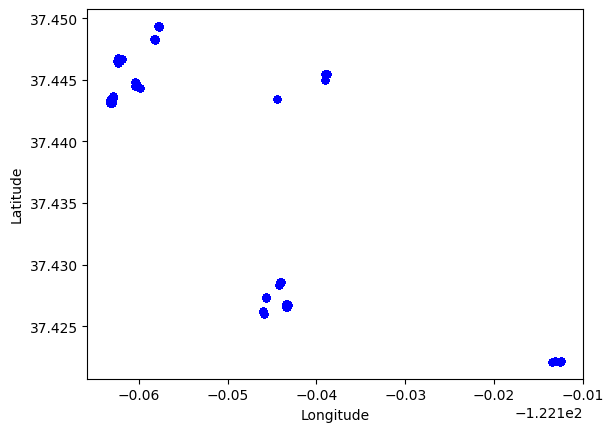

In [4]:
df.plot(x="Longitude", y="Latitude", kind="scatter", c="blue",
        colormap="Blues")

In [5]:
street_map = gpd.read_file('/home/ar/Google/DTU/Courses/Advanced business analytics/ABA - Project /Datasets/data/Cities.shp')
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]


In [6]:
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/home/ar/anaconda3/envs/ba_1/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Address 1,Latitude,Longitude,geometry
0,"1213 Newell Rd, Palo Alto, CA 94303",37.444976,-122.139073,POINT (-122.13907 37.44498)
1,"520 Webster St, Palo Alto, CA 94301",37.449249,-122.157746,POINT (-122.15775 37.44925)
2,"520 Webster St, Palo Alto, CA 94301",37.449249,-122.157746,POINT (-122.15775 37.44925)
3,"445 Bryant St, Palo Alto, CA 94301",37.446498,-122.162392,POINT (-122.16239 37.44650)
4,"1213 Newell Rd, Palo Alto, CA 94303",37.444976,-122.139073,POINT (-122.13907 37.44498)


In [7]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()


/tmp/ipykernel_5433/3154237576.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


/home/ar/anaconda3/envs/ba_1/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


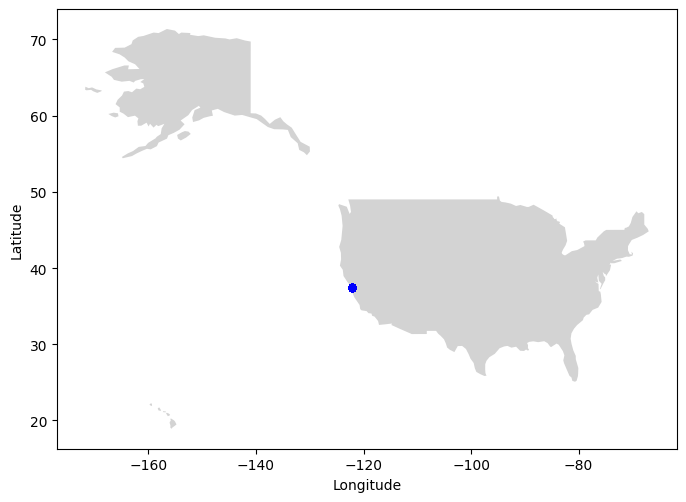

In [13]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
countries[countries["name"] == "United States of America"].plot(color="lightgrey",
                                                 ax=ax)
# df.plot(x="Longitude", y="Latitude", kind="scatter", c="blue",
#         colormap="Blues")
# plot points
df.plot(x="Longitude", y="Latitude", kind="scatter", 
        c="blue", colormap="Blues", 
        ax=ax)
#ax.grid(b=True, alpha=0.5)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['geometry']].plot(ax=ax, 
                                markersize=20, 
                                color='blue', 
                                marker='o', 
                                label='Neg')